# Training an MLP for Fashion MNIST Dataset Using `TensorFlow`

The purpose of this notebook is to assess the performance of a regularized MLP in dealing with overfitting.

For this problem, we will train two models on Fashion MNIST:
1. One hidden layer with ReLu activation, 128 nodes. No regularization, no dropout.
2. One hidden layer with ReLu activation, 48 nodes. L2 regularization with coeffcient 0.0001
and doprout with rate 0.2 at the hidden layer.



### Import the Required Libraries

In [15]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

### Load the Fashion MNIST Dataset from `tf.keras`

In [16]:
#### Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
num_pixels = 28 * 28
train_images = train_images.reshape( (60000, num_pixels) ).astype(np.float32) / 255.0
test_images = test_images.reshape( (10000, num_pixels) ).astype(np.float32) / 255.0

### Design and Training of the Model with no Regularization

In [17]:
# Number of hidden nodes for model 1
hideen_nodes = 128

## this uses the Functional API for definning the model for the two cases
nnet_inputs = Input(shape=(num_pixels,), name='images')
z = Dense(hideen_nodes, activation='relu', name='hidden')(nnet_inputs)
z = Dense(10, activation='softmax', name='output')(z)

our_first_model = Model(inputs=nnet_inputs, outputs=z)

In [19]:
# Train the first model without regularization
our_first_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
results = our_first_model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5200 - accuracy: 0.8196 - val_loss: 0.4388 - val_accuracy: 0.8399
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3906 - accuracy: 0.8593 - val_loss: 0.4041 - val_accuracy: 0.8494
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3484 - accuracy: 0.8731 - val_loss: 0.3928 - val_accuracy: 0.8553
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3207 - accuracy: 0.8822 - val_loss: 0.3498 - val_accuracy: 0.8745
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3002 - accuracy: 0.8890 - val_loss: 0.3486 - val_accuracy: 0.8748
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2892 - accuracy: 0.8941 - val_loss: 0.3214 - val_accuracy: 0.8838
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2730 - accuracy: 0.8999 - val_loss: 0.3757 - val_accuracy:

### Design and Training of the Model with Regularization and Dropout

In [28]:
## Set the parameters
reg_val = 0.0001
dropout_rate = 0.2
hideen_nodes2 = 48

## this uses the Functional API for definning the model for the second case
nnet_inputs2 = Input(shape=(num_pixels,), name='images')
z2 = Dense(hideen_nodes2, activation='relu', kernel_regularizer=regularizers.l2(reg_val), bias_regularizer=regularizers.l2(reg_val), name='hidden')(nnet_inputs2)
z2 = Dropout(dropout_rate)(z2)
z2 = Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_val), bias_regularizer=regularizers.l2(reg_val), name='output')(z2)

our_second_model = Model(inputs=nnet_inputs2, outputs=z2)

In [29]:
# Train the second model; the regularized model
our_second_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
results2 = our_second_model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6485 - accuracy: 0.7791 - val_loss: 0.4824 - val_accuracy: 0.8318
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4847 - accuracy: 0.8360 - val_loss: 0.4390 - val_accuracy: 0.8520
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4507 - accuracy: 0.8483 - val_loss: 0.4243 - val_accuracy: 0.8619
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.8556 - val_loss: 0.3967 - val_accuracy: 0.8656
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4222 - accuracy: 0.8586 - val_loss: 0.3958 - val_accuracy: 0.8672
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8629 - val_loss: 0.4070 - val_accuracy: 0.8651
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4080 - accuracy: 0.8639 - val_loss: 0.3848 - val_accuracy:

In [30]:
# Print out the loss and accuracy values on the test set for the two models
test_loss1, test_acc1 = our_first_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy without regularization: {100 * test_acc1 : 3.2f}%')

test_loss2, test_acc2 = our_second_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy with regularization: {100 * test_acc2 : 3.2f}%')

313/313 - 0s - loss: 0.5816 - accuracy: 0.8813 - 350ms/epoch - 1ms/step
Test Accuracy without regularization:  88.13%
313/313 - 0s - loss: 0.4365 - accuracy: 0.8694 - 386ms/epoch - 1ms/step
Test Accuracy with regularization:  86.94%


### Visualize the Learning Curves for the Two Models

In [31]:
# Get results from the history of the two NN trainings
loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss2 = results2.history['loss']
val_loss2 = results2.history['val_loss']
acc2 = results2.history['accuracy']
val_acc2 = results2.history['val_accuracy']

epochs = np.arange(len(loss))

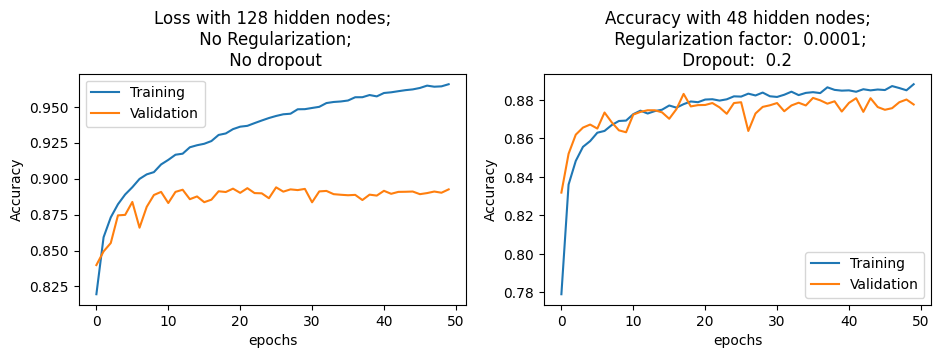

In [43]:
# Plot learning curves for two cases

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label='Validation')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title(f'Loss with {hideen_nodes} hidden nodes;\n No Regularization;\n No dropout')
ax1.legend()

ax2.plot(epochs, acc2, label='Training')
ax2.plot(epochs, val_acc2, label='Validation')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title(f'Accuracy with {hideen_nodes2} hidden nodes;\n Regularization factor: {reg_val : 3.2g};\n Dropout: {dropout_rate : 3.2g} ')
ax2.legend()

### Visualize the Neuron Weights across the Two Models

In [ ]:
# Get weights for two models
trained_parameters1 = our_first_model.get_layer('hidden').get_weights()
W1_1 = trained_parameters1[0]
trained_parameters2 = our_first_model.get_layer('output').get_weights()
W2_1 = trained_parameters2[0]
trained_parameters1 = our_second_model.get_layer('hidden').get_weights()
W1_2 = trained_parameters1[0]
trained_parameters2 = our_second_model.get_layer('output').get_weights()
W2_2 = trained_parameters2[0]

Text(0.5, 0.98, 'Model 1: 128 nodes; No Regularization; No dropout\n Model 2: 48 nodes; L2 coeff=0.0001; dropout=0.2\n')

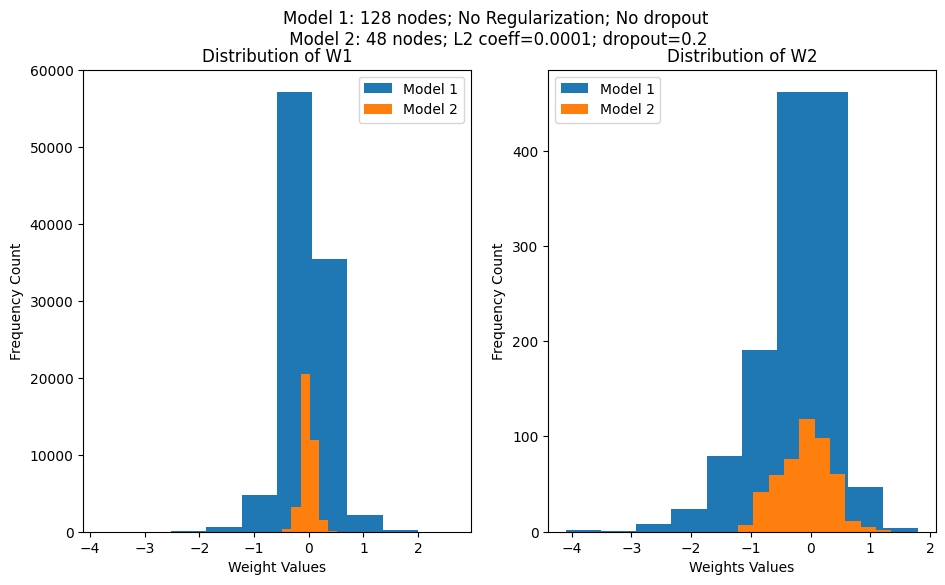

In [52]:
# Plot histogram of weights
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.hist(W1_1.reshape(-1))
plt.hist(W1_2.reshape(-1))
plt.xlabel('Weight Values')
plt.ylabel('Frequency Count')
plt.title(f'Distribution of W1')
plt.legend(['Model 1', 'Model 2'])

plt.subplot(1,2,2)
plt.hist(W2_1.reshape(-1))
plt.hist(W2_2.reshape(-1))
plt.xlabel('Weights Values')
plt.ylabel('Frequency Count')
plt.title(f'Distribution of W2')
plt.legend(['Model 1', 'Model 2'])

plt.suptitle(f'Model 1: {hideen_nodes} nodes; No Regularization; No dropout\n Model 2: {hideen_nodes2} nodes; L2 coeff={reg_val}; dropout={dropout_rate}\n')


According to the results shown above for two mentioned cases, one can easily see that the range that values of the weights elements lie within is much tighter in the case with L2 regularization and dropout present compared to those weights values in the case with no regularization and no dropout. W1 elements values which mostly range within [-1 , +1] in the first case, ranges within ~[-0.4 , +0.4] for the second case. Also, W2 values for the first case with no regularization and no dropout range within ~[-3 , +1], where those for the second model with regularization and dropout range within [-1 , +1].

Further, the frequency of the W1 elements which are around zero value is higher with regularization and dropout present. It means that the weights get smaller by using regularization and dropout. In addition, one could also see from the learning curves that the case with
regularization and dropout tends to remove the over-fitting and gives us closer values for training and validation accuracy.

### Visualize the Confusion Matrix for the Regularized Model

In [ ]:
num_classes = 10

# Initialize the class prediction vector and the confusion matrix
class_decision = np.zeros((test_labels.shape[0],1))
Confusion_Matrix = np.zeros((num_classes,num_classes))

# perform inference on a single image:
for i in range(test_labels.shape[0]):
  prediction = our_second_model.predict(test_images[i].reshape(1,num_pixels))
  decision_index = np.argmax(prediction)
  class_decision[i] = decision_index
  Confusion_Matrix[test_labels[i],decision_index] += 1

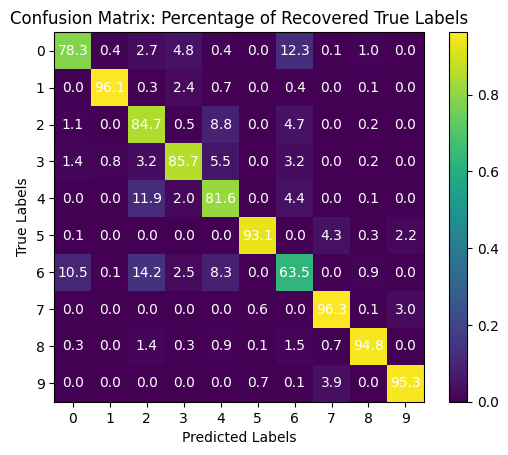

In [73]:
Confusion_Matrix_Rate = Confusion_Matrix/(np.sum(Confusion_Matrix, axis=1).reshape(10,1))

#print(Confusion_Matrix)
#print(Confusion_Matrix_Rate)
# Check the number of examples for each true label:: There are 1000 examples/label
#print('Total True Labels = ', np.sum(Confusion_Matrix, axis=1).reshape(10,1))

# Plot heatmap of the confusion matrix
plt.figure(3)
plt.imshow(Confusion_Matrix_Rate)
plt.colorbar()
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix: Percentage of Recovered True Labels')

for i in range(num_classes):
  for j in range(num_classes):
    plt.text(j, i, round(Confusion_Matrix_Rate[i, j]*100,1), ha="center", va="center", color="w")

plt.show()

What does this matrix tell us?!
- The true labels and those predicted by the MLP model are shown on the y-axis and x-axis, respectively. The matrix above is supposed to give us the classification accuracy rate for each class on the diagonal element and also the off-diagonal elements for each row shows us the portion of times that class has been misclassified by the MLP as another class corresponding to their indices. For instance, the element[6,0] of this matrix shows us 0.138, which
means out of the 1000 examples we truly had for class 6 (Shirt), 138 were classified as class 0 (T-shirt or top) by the MLP and this makes perfect sense as these two classes are similar items. Thus, ideally, this matrix should be an identity with a perfect MLP, but it is not!

- Regarding the confusion rate values shown in the matrix above, the classes 0 (T-shirt or top) and 6 (Shirt) are the two classes that are most likely to get confused using our MLP. This is based on 138 true shirts that are misclassified as t-shirt or top and 85 true T-shirts or tops that are misclassified as shirts. Sum of these two is the highest among any other pairwise class comparison. The second most likely to be confused pair of classes are 2 (pullover) and 4 (coat).
